# Создание собственного распределения

Необходимо рассмотреть функцию, которая является плотностью вероятности некоторой НСВ. Для этой случайной величины:
* проверить условие нормировки плотности;
* построить графики плотности и функции распределения;
* рассчитать вероятность попадания случайной величины в некоторый интервал;
* вычислить математическое ожидание, дисперсию и среднее квадратическое отклонение; 
* вычислить квантиль уровня q и p%-ную точку случайной величины;
* определить коэффициент асимметрии и эксцесс.

**Рассмотрим функцию плотности вероятности НСВ**

$$
\phi(x)=\begin{cases}
0, &\text{при $x\leq0$,}\\
a(4x-x^{3}), &\text{при $0<x\leq2$,}\\
0, &\text{при $x>2$.}
\end{cases}
$$

**Найдем коэффициент а**

In [2]:
import sympy as sp

x, a = sp.symbols('x a', real=True)
f = a * (4*x - x**3)

integral = sp.integrate(f, (x, 0, 2))

equation = sp.Eq(integral, 1)
solution = sp.solve(equation, a)
print(f"Коэффициент a = {solution[0]}")

Коэффициент a = 1/4


Таким образом плотность вероятности имеет вид:
$$
\phi(x)=\begin{cases}
0, &\text{при $x\leq0$,}\\
x-\frac{x^3}{4}, &\text{при $0<x\leq2$,}\\
0, &\text{при $x>2$.}
\end{cases}
$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import rv_continuous
from scipy import integrate

**Определение функции плотности в классе**

In [11]:
class CustomDistributionExample(rv_continuous):
    def __init__(self, a, b):
        super().__init__(a=a, b=b, name='example_dist')

    def _pdf(self, x):
        """Плотность распределения"""
        result = np.zeros_like(x)
        mask = (x >= self.a) & (x <= self.b)
        result[mask] = x[mask] - x[mask]**3 / 4
        return result

    def _cdf(self, x):
        """Функция распределения"""
        result = np.zeros_like(x)
        mask = (x >= self.a) & (x <= self.b)
        result[mask] = x[mask]**2 / 2 - x[mask]**4 / 16
        result[x > self.b] = 1
        return result

**Создаем экземпляр распределения**

In [12]:
a, b = 0.0, 2.0
dist = CustomDistributionExample(a, b)

**Генерация выборки**

In [24]:
sample = dist.rvs(size=10000)
print(sample[:10])

[0.95610773 1.15348245 0.83916888 0.56021849 1.05240311 1.7766302
 1.28868551 0.95996985 1.22341983 0.30099913]


**Проверка условия нормировки плотности**

In [25]:
integral, error = integrate.quad(dist.pdf, 0, 2)
print(f"Проверка нормировки: ∫f(x)dx = {integral:.6f} (ошибка: {error:.2e})")

Проверка нормировки: ∫f(x)dx = 1.000000 (ошибка: 1.11e-14)


**Построение графиков плотности и функции распределения**

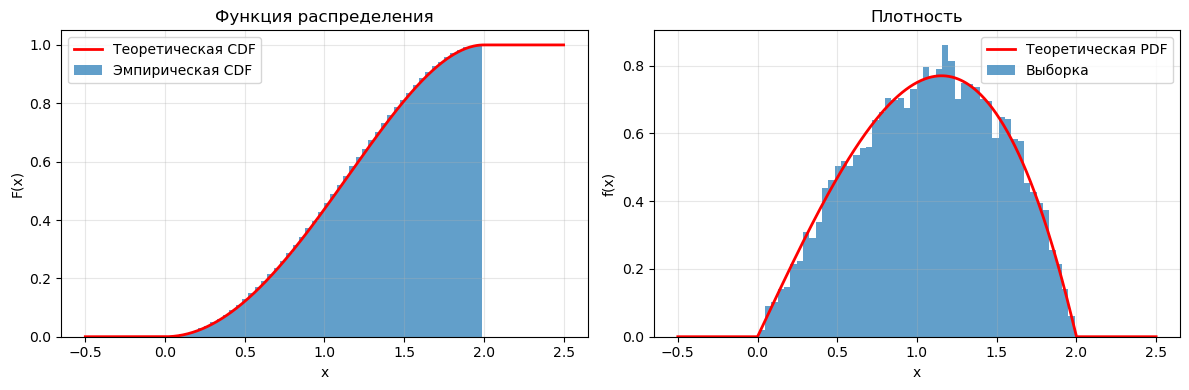

In [26]:
x_plot = np.linspace(-0.5, 2.5, 500)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(x_plot, dist.cdf(x_plot), 'r-', linewidth=2, 
         label='Теоретическая CDF')
ax1.hist(sample, bins=50, density=True, cumulative=True, alpha=0.7, 
         label='Эмпирическая CDF')
ax1.set_xlabel('x')
ax1.set_ylabel('F(x)')
ax1.set_title('Функция распределения')
ax1.legend()
ax1.grid(True, alpha=0.3)

ax2.plot(x_plot, dist.pdf(x_plot), 'r-', linewidth=2, 
         label='Теоретическая PDF')
ax2.hist(sample, bins=50, density=True, alpha=0.7, 
         label='Выборка')
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.set_title('Плотность')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Вероятность попадания случайной величины в интервал**

In [27]:
prob = dist.cdf(1) - dist.cdf(0)
print(f"P(0 < X < 1) = {prob:.4f}")

P(0 < X < 1) = 0.4375


**Вычисление числовых характеристик**

In [28]:
mean = dist.mean()
var = dist.var()
std = dist.std()
print(f"Математическое ожидание: {mean:.4f}")
print(f"Дисперсия: {var:.4f}")
print(f"Среднее квадратическое отклонение: {std:.4f}")

Математическое ожидание: 1.0667
Дисперсия: 0.1956
Среднее квадратическое отклонение: 0.4422


**Вычисление квантилей и q%-ной точки**

In [29]:
q = 0.4
quantile_q = dist.ppf(q)
print(f"Квантиль уровня {q}: {quantile_q:.4f}")

p = 20
percent_point = dist.ppf(p/100)
print(f"{p}%-ная точка: {percent_point:.4f}")

Квантиль уровня 0.4: 0.9495
20%-ная точка: 0.6498


**Определение коэффициента асимметрии и эксцесса**

In [31]:
skew = dist.stats(moments='s')
kurtosis = dist.stats(moments='k') - 3 
print(f"Коэффициент асимметрии: {skew:.4f}")
print(f"Эксцесс: {kurtosis:.4f}")

Коэффициент асимметрии: -0.1253
Эксцесс: -3.8200
